# <center> RANDOM FOREST FOR REGRESSION PROBLEM FROM SCRATCH </center>  
<center><b> Armin Hajar Sabri Sabri</b></center> 

## Abstract

This project focuses on implementing algorithms for decision trees and random forest for regression problem — without using machine learning libraries such as Scikit-learn. The dataset for the analysis (Housing Price) has been split into training and test datasets. The task is to build decision tree and random forest algorithms with the training dataset and then apply the machine learning models on the test dataset to generate predictions.
The training and test datasets were concatenated to a single dataset for easy data preprocessing. The resulting dataset was prepared for the analysis by removing null values and dropping features that are not strongly correlated to the target feature “SalePrice”. The clean dataset was split into training and test datasets.
The decision tree algorithm presented here follows similar steps presented in [1], which include writing helper functions required in building the ML algorithm. Then Random Forest algorithm, which is an ensemble of many decisions trees, is based on the decision tree algorithm and bootstrapped training dataset.  The results show the ML algorithms perform optimally, with the average root-mean-square error of 0.56.



## Introduction

Machine learning (ML) is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns, and make decisions with minimal human intervention [2].
Arthur Samuel (a renowned AI scientist) defined Machine Learning (ML) as the field of study that gives computers to ability to learn without being explicitly programmed. According to Tom Mitchell, “A computer program is said to learn from experience E with respect to some class of tasks T and performance P, if its performance at task in T, as measured by P, improves with experience".
For computers to learn from data and make meaningful predictions, ML algorithms are required for data preprocessing and analysis. A list of popular ML tools and software for data analysis includes Scikit-learn, TensorFlow, Keras, Pytorch, and Colab. Most of these conventional libraries are free and can be used to perform regression and classification tasks, simply by writing a few lines of code. 
However, the goal of this project is to implement Decision Trees and Random Forest from scratch using Python packages such as Pandas and NumPy. The following section presents the decision tree and random forest algorithms.




## Import Statement

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
from scipy import stats

%matplotlib inline 

import random
from pprint import pprint


##  Loading Data

####  Here the given datasets were read with Pandas. 


In [2]:
# Reading the csv files and saving them to Pandas dataframes
df_train= pd.read_csv('housing_price_train.csv')
df_test=pd.read_csv('housing_price_test.csv')

In [3]:
# Showing the first five rows of the train dataframe
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Showing the first five rows of the test dataframe
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Checking the size of the datasets
print('The shape of the train data set is :',df_train.shape)
print('The shape of the test data set is :',df_test.shape)

The shape of the train data set is : (1460, 81)
The shape of the test data set is : (1560, 80)


In [6]:

# The summary statistics for SalePrice 
print(df_train['SalePrice'].describe()) 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [7]:
df_train.dtypes # Check data types for the training dataset

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
df_test.dtypes # Check data types for the test dataset


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

## Visualization

- The boxplots show outliers for selected features that are strongly correlated with SalePrice

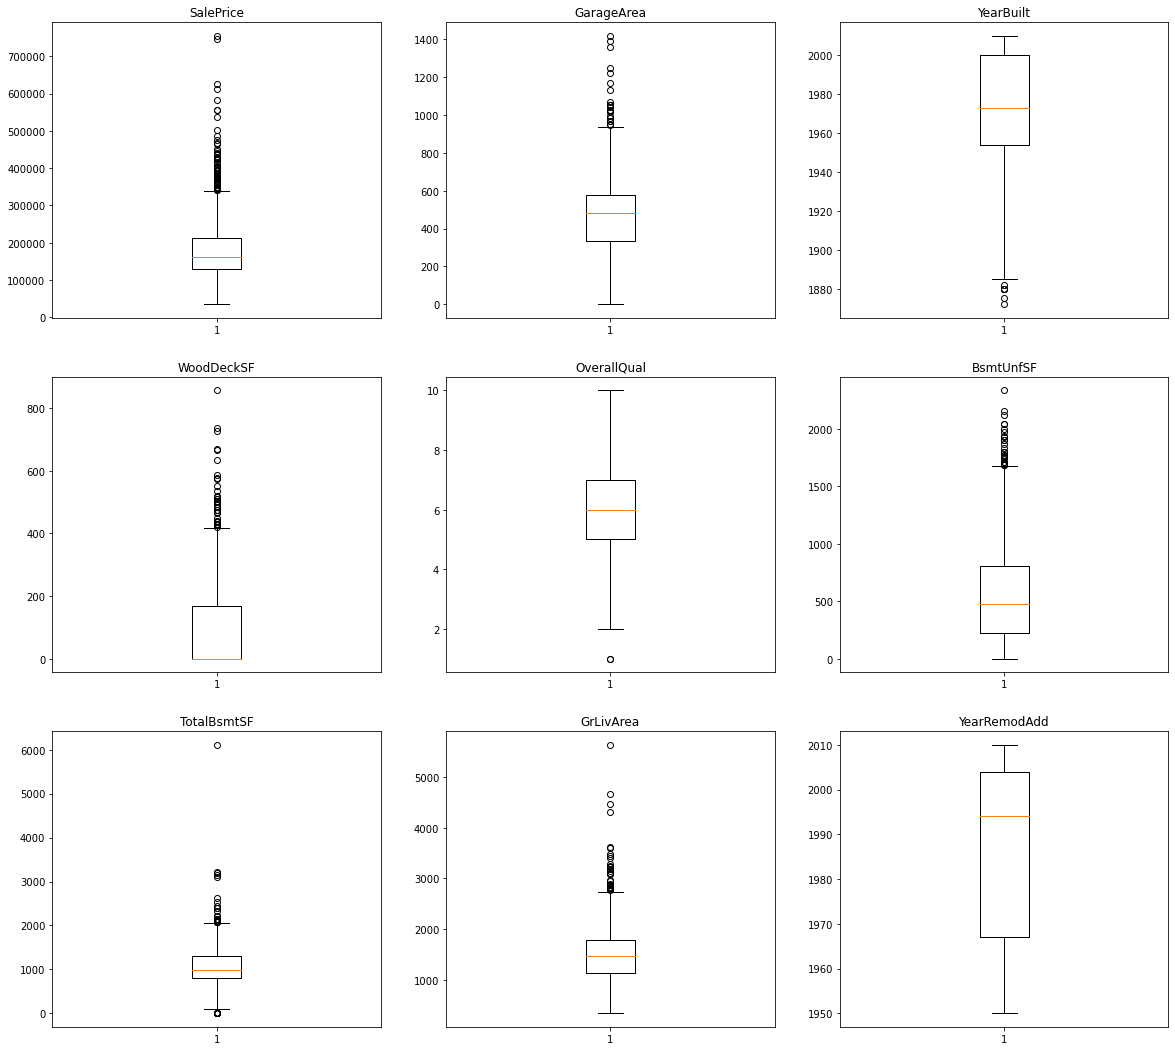

In [8]:
plt.figure(figsize=(20,25))
ax1 = plt.subplot(4, 3, 1);ax1.boxplot(df_train['SalePrice']);ax1.title.set_text('SalePrice')

ax2 = plt.subplot(4, 3, 2);ax2.boxplot(df_train['GarageArea']);ax2.title.set_text('GarageArea')
ax3 = plt.subplot(4, 3, 3);ax3.boxplot(df_train['YearBuilt']);ax3.title.set_text('YearBuilt')
ax4 = plt.subplot(4, 3, 4);ax4.boxplot(df_train['WoodDeckSF']);ax4.title.set_text('WoodDeckSF')

ax5 = plt.subplot(4, 3, 5);ax5.boxplot(df_train['OverallQual']);ax5.title.set_text('OverallQual')
ax6 = plt.subplot(4, 3, 6);ax6.boxplot(df_train['BsmtUnfSF']);ax6.title.set_text('BsmtUnfSF')
ax7 = plt.subplot(4, 3, 7);ax7.boxplot(df_train['TotalBsmtSF']);ax7.title.set_text('TotalBsmtSF')
ax8 = plt.subplot(4, 3, 8);ax8.boxplot(df_train['GrLivArea']);ax8.title.set_text('GrLivArea')
ax9 = plt.subplot(4, 3, 9);ax9.boxplot(df_train['YearRemodAdd']);ax9.title.set_text('YearRemodAdd')

plt.show()

The boxplots show ome features of interest have outliers. Because the submission requirement is such that the predictions should have 1460 rows, the outliers have been retained.

- A histogram of SalesPrice for training dataset

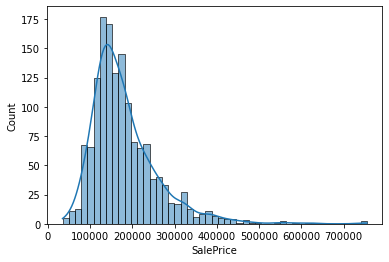

In [9]:
sns.histplot(df_train.SalePrice,kde=True)
plt.show()

- Plotting the ditribution using the log transformation

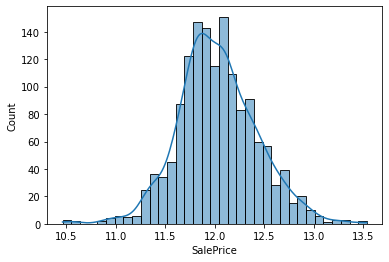

In [10]:
sns.histplot(np.log(df_train.SalePrice),kde=True)
plt.show()

#

#### Heatmap of the selected features

In [12]:
##
correlation = df_train.corr()
correlation["SalePrice"].sort_values(ascending=False).head(11) #

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

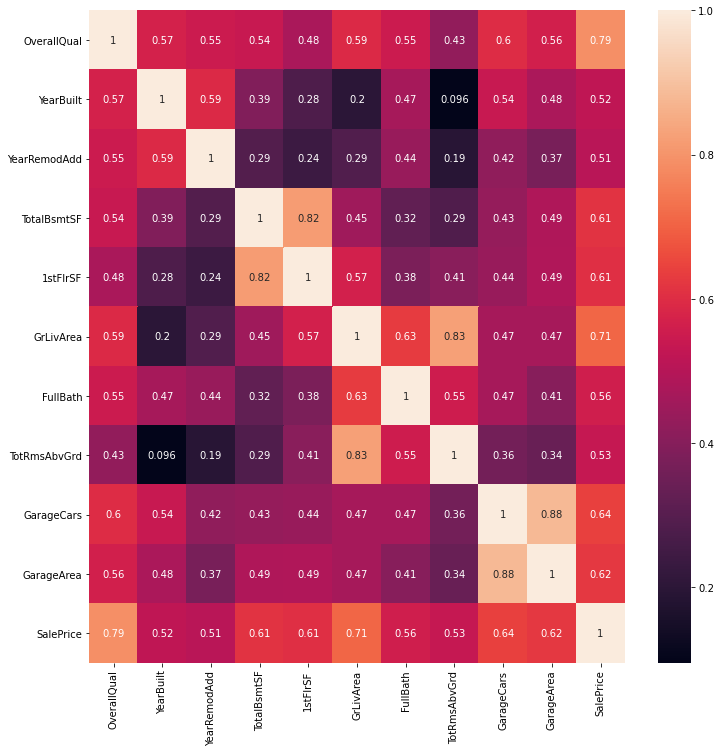

In [12]:
# Here we plot a heatmap that shows the highly correlated features.
high_corr_features = correlation.index[abs(correlation["SalePrice"])>0.5] # correlation that is more than 0.5
plt.figure(figsize=(12,12))
corr_map = sns.heatmap(df_train[high_corr_features].corr(),annot=True)

#### Scatterplots of the selected features

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

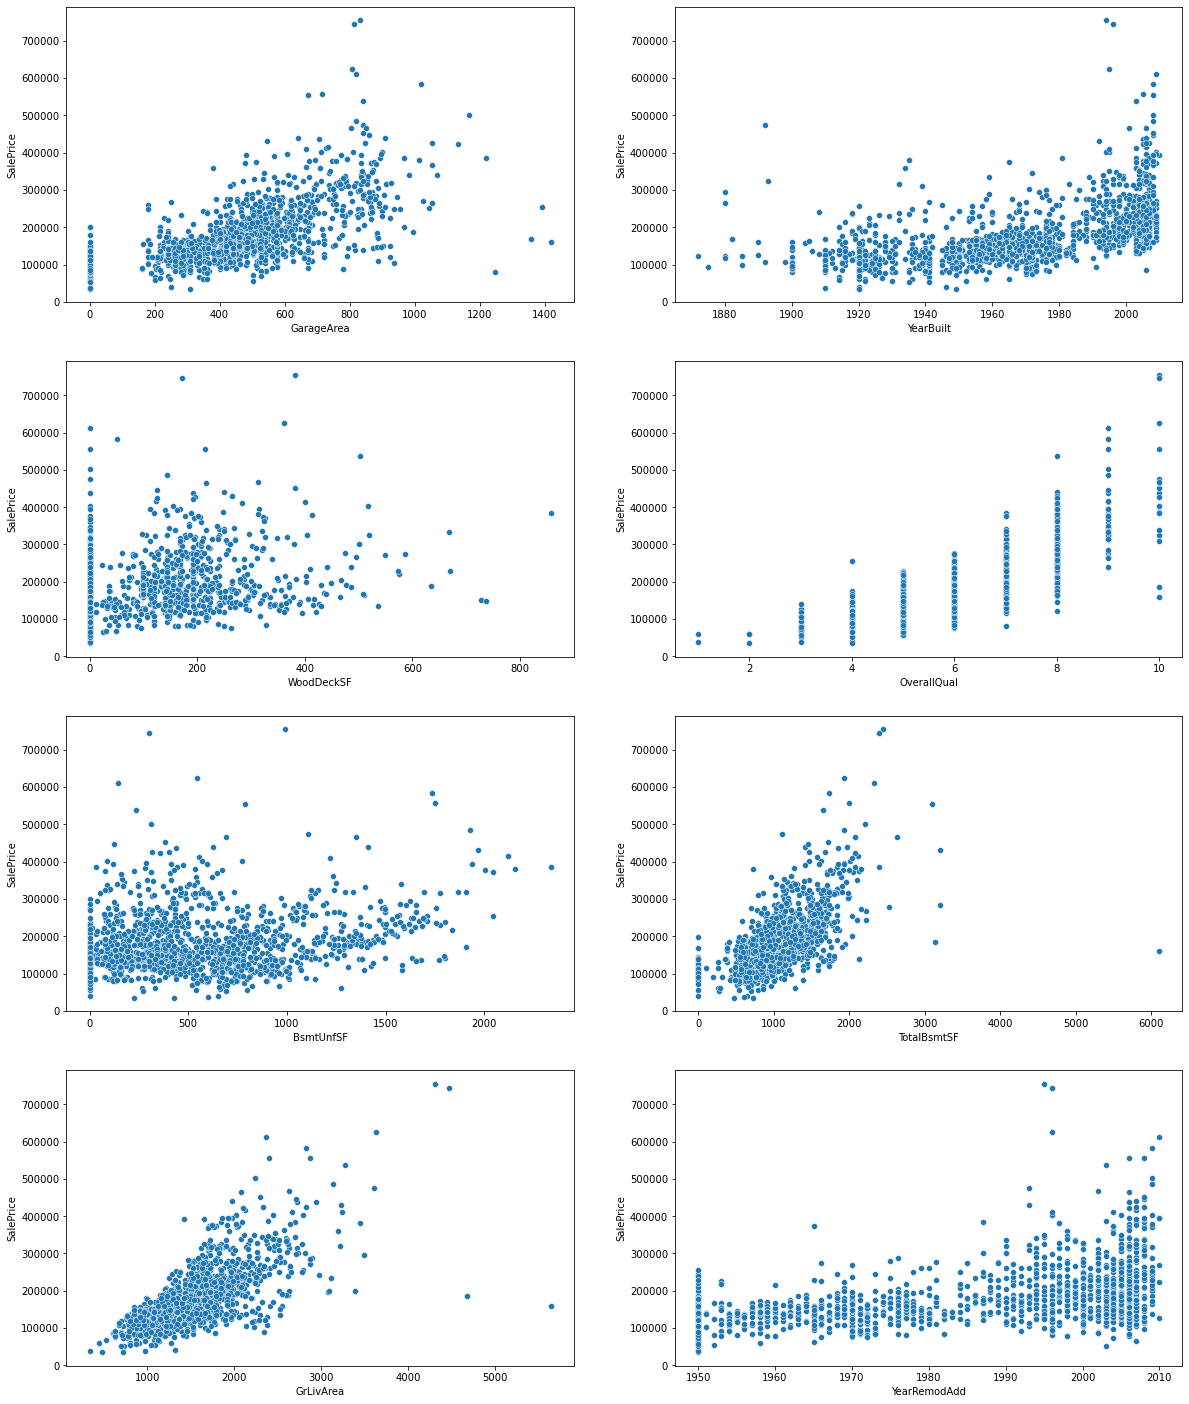

In [13]:
fig=plt.figure(figsize=(20,25))


#fig = plt.figure(figsize=(12,10))
#GarageArea
plt.subplot(4,2,1)
sns.scatterplot(data=df_train, x='GarageArea', y="SalePrice")

#YearBuilt
plt.subplot(4,2,2)
sns.scatterplot(data=df_train, x='YearBuilt', y="SalePrice")

#WoodDeckSF
plt.subplot(4,2,3)
sns.scatterplot(data=df_train, x='WoodDeckSF', y="SalePrice")

#OverallQual
plt.subplot(4,2,4)
sns.scatterplot(data=df_train, x='OverallQual', y="SalePrice")

#BsmtUnfSF
plt.subplot(4,2,5)
sns.scatterplot(data=df_train, x='BsmtUnfSF', y="SalePrice")

#TotalBsmtSF
plt.subplot(4,2,6)
sns.scatterplot(data=df_train, x='TotalBsmtSF', y="SalePrice")

#GrLivArea
plt.subplot(4,2,7)
sns.scatterplot(data=df_train, x='GrLivArea', y="SalePrice")

#YearRemodAdd
plt.subplot(4,2,8)
sns.scatterplot(data=df_train, x='YearRemodAdd', y="SalePrice")



## Data Preprocessing

- The training and test datasets were concatenated to a single dataset for easy data preprocessing.

In [14]:
concdata = pd.concat([df_train,df_test], axis=0) # Combine the datasets using pd.conc

# Save id column of both train and test data sets to a new varibales. 
id_train=df_train['Id'] 
id_test=df_test['Id'] 


y_train = df_train['SalePrice']
concdata = concdata.drop(['Id','SalePrice'], axis=1) # Drop the id and SalePrice columns 
print('The shape of combined data is:', concdata.shape)

The shape of combined data is: (3020, 79)


In [16]:
concdata.head() # First 5 rows of the concatenated data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
# Check unique values for each feature
print('UNIQUE VALUES\n')
for col in concdata.columns:
    print(" {column}: {length} ".format(column =col, length = len(concdata[col].unique())))

UNIQUE VALUES

 MSSubClass: 16 
 MSZoning: 7 
 LotFrontage: 129 
 LotArea: 1951 
 Street: 2 
 Alley: 3 
 LotShape: 4 
 LandContour: 4 
 Utilities: 3 
 LotConfig: 5 
 LandSlope: 3 
 Neighborhood: 25 
 Condition1: 9 
 Condition2: 8 
 BldgType: 5 
 HouseStyle: 8 
 OverallQual: 10 
 OverallCond: 9 
 YearBuilt: 118 
 YearRemodAdd: 61 
 RoofStyle: 6 
 RoofMatl: 8 
 Exterior1st: 17 
 Exterior2nd: 19 
 MasVnrType: 5 
 MasVnrArea: 445 
 ExterQual: 4 
 ExterCond: 5 
 Foundation: 6 
 BsmtQual: 5 
 BsmtCond: 5 
 BsmtExposure: 5 
 BsmtFinType1: 7 
 BsmtFinSF1: 992 
 BsmtFinType2: 7 
 BsmtFinSF2: 273 
 BsmtUnfSF: 1136 
 TotalBsmtSF: 1059 
 Heating: 6 
 HeatingQC: 5 
 CentralAir: 2 
 Electrical: 6 
 1stFlrSF: 1083 
 2ndFlrSF: 635 
 LowQualFinSF: 36 
 GrLivArea: 1292 
 BsmtFullBath: 5 
 BsmtHalfBath: 4 
 FullBath: 5 
 HalfBath: 3 
 BedroomAbvGr: 8 
 KitchenAbvGr: 4 
 KitchenQual: 5 
 TotRmsAbvGrd: 14 
 Functional: 8 
 Fireplaces: 5 
 FireplaceQu: 6 
 GarageType: 7 
 GarageYrBlt: 104 
 GarageFinish: 4 

In [18]:
len(list(concdata.select_dtypes(['object']).columns)) # Number of object types in the dataset

43

In [19]:
# Find the columns with numerical values
numerics=['int16','int32','int64','float16','float32','float64']
numeric_columns=list(concdata.select_dtypes(include=numerics))
numeric_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [20]:
concdata.describe(include='all') # Summary statistics of the dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,3020.000000,3016,2524.000000,3020.000000,3020,208,3020,3020,3018,3020,...,3020.000000,3020.000000,10,594,109,3020.000000,3020.000000,3020.000000,3019,3020
unique,NaN,6,NaN,NaN,2,2,4,4,2,5,...,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,2346,NaN,NaN,3007,124,1925,2714,3017,2205,...,NaN,NaN,4,341,99,NaN,NaN,NaN,2611,2480
mean,57.044702,NaN,69.360935,10227.190397,NaN,NaN,NaN,NaN,NaN,NaN,...,16.029470,2.176490,NaN,NaN,NaN,49.839404,6.208940,2007.791722,NaN,NaN
std,42.534396,NaN,23.286768,8637.596012,NaN,NaN,NaN,NaN,NaN,NaN,...,56.075395,35.064644,NaN,NaN,NaN,558.391738,2.717648,1.319710,NaN,NaN
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,59.000000,7479.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,68.000000,9455.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11566.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [21]:
# Summary statistics for "numeric_columns"
concdata[numeric_columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,3020.000000,2524.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,2997.000000,3019.000000,3019.000000,...,3019.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,57.044702,69.360935,10227.190397,6.094371,5.567550,1971.307285,1984.277152,102.472139,442.648559,49.507453,...,473.384896,93.573510,47.324834,23.190728,2.586755,16.029470,2.176490,49.839404,6.208940,2007.791722
std,42.534396,23.286768,8637.596012,1.406711,1.111418,30.278988,20.903610,179.452850,455.341416,168.674807,...,215.296894,125.849122,67.479312,64.425666,25.070436,56.075395,35.064644,558.391738,2.717648,1.319710
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7479.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9455.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,371.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11566.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [22]:
# Check NULL values and the percentage of null values

miss_values=concdata.isnull().sum().sort_values(ascending=False)
percent_nan = (concdata.isnull().sum() / concdata.isnull().count()*100).sort_values(ascending=False)
nan_data = pd.concat([miss_values, percent_nan], axis=1, keys=['miss_values', 'Percent'])
nan_data=pd.DataFrame(nan_data)

nan_data.head(10)

,miss_values,Percent
PoolQC,3010,99.668874
MiscFeature,2911,96.390728
Alley,2812,93.112583
Fence,2426,80.331126
FireplaceQu,1470,48.675497
LotFrontage,496,16.423841
GarageCond,163,5.397351
GarageQual,163,5.397351
GarageYrBlt,163,5.397351
GarageFinish,163,5.397351


In [23]:
# Drop the columns that contain more than 70%  missing values
threshold=int(len(concdata)*0.70)
concdata.dropna(axis=1,thresh=threshold,inplace=True)

In [24]:
concdata.shape

(3020, 74)

In [25]:
# Remove space from columns
concdata.columns=concdata.columns.str.replace(' ',"")

In [26]:
# Check columns that have NULL values
missing_values=concdata.isnull().sum().sort_values(ascending=False)
missing_values=pd.DataFrame(concdata.isnull().sum().sort_values(ascending=False),columns=['missing_values'])
missing_values[missing_values['missing_values']>0]

,missing_values
LotFrontage,496
GarageCond,163
GarageQual,163
GarageYrBlt,163
GarageFinish,163
GarageType,161
BsmtCond,83
BsmtExposure,83
BsmtQual,82
BsmtFinType2,81


In [27]:
# Replace missing values with the mode values

for col in list(missing_values.index):
    concdata[col].fillna(value = concdata[col].mode()[0],inplace=True)

# Replace all '?',"-" and possible null rpresentations in the dataframe by None

df_train.replace(['?','Na','NAN','none','','-','...','np'],"None",inplace=True)



In [28]:
concdata.isnull().sum().sort_values(ascending=False) # Check if the dataset is clean (no Null values)


SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
MSSubClass       0
Length: 74, dtype: int64

In [29]:
concdata.dropna(inplace=True)

In [30]:
concdata.isnull().sum().max()



0

In [31]:

# Split the clean dataset into train & test datasets

train_df1 =concdata[:len(y_train)]
train_df1=pd.concat([train_df1,y_train],axis=1) # Concatenate SalePrice to the training dataset
test_df1 = concdata[len(y_train):]

#Print the shapes
print(train_df1.shape, test_df1.shape)

(1460, 75) (1560, 74)


In [32]:
train_df1.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


- Here categorical variables are converted to numerical values using pandas function "get_dummies". 


In [33]:
concdata2=pd.get_dummies(concdata)  # Save dataset with a new variable concdata2
concdata2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,120,60.0,3196,7,5,2003,2004,18.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1556,20,75.0,7388,5,6,1959,2002,0.0,405.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1557,160,30.0,3180,7,5,2005,2005,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1558,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
# Split the dataset

train_df2 =concdata2[:len(y_train)]
train_df2=pd.concat([train_df2,y_train],axis=1)
test_df2 = concdata2[len(y_train):]

print(train_df2.shape, test_df2.shape)

(1460, 275) (1560, 274)


## MACHINE LEARNING ALGORITHMS
### Decicion Tree

#### Helper functions

In [35]:
#The helper functions operate on a NumPy 2d-array. 
numpy_2darray=train_df1.values[:5]
numpy_2darray

array([[60, 'RL', 65.0, 8450, 'Pave', 'Reg', 'Lvl', 'AllPub', 'Inside',
        'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7, 5, 2003,
        2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'BrkFace', 196.0,
        'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ', 706.0, 'Unf', 0.0,
        150.0, 856.0, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0, 1710, 1.0,
        0.0, 2, 1, 3, 1, 'Gd', 8, 'Typ', 0, 'Attchd', 2003.0, 'RFn', 2.0,
        548.0, 'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, 0, 2, 2008, 'WD',
        'Normal', 208500],
       [20, 'RL', 80.0, 9600, 'Pave', 'Reg', 'Lvl', 'AllPub', 'FR2',
        'Gtl', 'Veenker', 'Feedr', 'Norm', '1Fam', '1Story', 6, 8, 1976,
        1976, 'Gable', 'CompShg', 'MetalSd', 'MetalSd', 'None', 0.0,
        'TA', 'TA', 'CBlock', 'Gd', 'TA', 'Gd', 'ALQ', 978.0, 'Unf', 0.0,
        284.0, 1262.0, 'GasA', 'Ex', 'Y', 'SBrkr', 1262, 0, 0, 1262, 0.0,
        1.0, 2, 0, 3, 1, 'TA', 6, 'Typ', 1, 'Attchd', 1976.0, 'RFn', 2.0,
        460.0, 'TA', 'TA', 'Y', 

#####  Leaf  Node

In [37]:
def leaf_node_func(numpy_2d_array):
    
    saleprice_column = numpy_2d_array[:, -1] 
    leaf_node = np.mean(saleprice_column)
        
    
    return leaf_node

##### Possible Split

In [39]:
def possible_splits_func(numpy_2darray):
    """
    - Input : numpy 2d_array
    - An empty dictionary is created. The keys of the dictionary is the column indices
      and the values are list that contains unique values or unique categorical for possible splits.
    - Output: A dictionary 
    """
    
    possible_splits = {}  
    _, column_number = numpy_2darray.shape
    for column_index in range(column_number - 1): 
        
        column_values = numpy_2darray[:, column_index]  
        unique_column_values = np.unique(column_values) # Retrieve the unique values in the columns
        
        possible_splits[column_index] = unique_column_values
    
    return possible_splits # All possible splits are returned

In [40]:
# Show possible splits
poss=possible_splits_func(numpy_2darray)
poss

{0: array([20, 60, 70], dtype=object),
 1: array(['RL'], dtype=object),
 2: array([60.0, 65.0, 68.0, 80.0, 84.0], dtype=object),
 3: array([8450, 9550, 9600, 11250, 14260], dtype=object),
 4: array(['Pave'], dtype=object),
 5: array(['IR1', 'Reg'], dtype=object),
 6: array(['Lvl'], dtype=object),
 7: array(['AllPub'], dtype=object),
 8: array(['Corner', 'FR2', 'Inside'], dtype=object),
 9: array(['Gtl'], dtype=object),
 10: array(['CollgCr', 'Crawfor', 'NoRidge', 'Veenker'], dtype=object),
 11: array(['Feedr', 'Norm'], dtype=object),
 12: array(['Norm'], dtype=object),
 13: array(['1Fam'], dtype=object),
 14: array(['1Story', '2Story'], dtype=object),
 15: array([6, 7, 8], dtype=object),
 16: array([5, 8], dtype=object),
 17: array([1915, 1976, 2000, 2001, 2003], dtype=object),
 18: array([1970, 1976, 2000, 2002, 2003], dtype=object),
 19: array(['Gable'], dtype=object),
 20: array(['CompShg'], dtype=object),
 21: array(['MetalSd', 'VinylSd', 'Wd Sdng'], dtype=object),
 22: array(['Met

##### Split the numpy_2d_array

In [41]:
def spliting(numpy_2darray, which_column, which_column_value):
    
    """
    In this function we split the numpy_2d_array into the right and left sides. This is determined
    by two paramters: split column and split value. The outputs are two arrays: left and right.

    """
    
    split_column_values = numpy_2darray[:, which_column]
    type_of_feature = FEATURE_TYPES[which_column]

    
    # continous features
    if type_of_feature == "continuous": 
        left_array = numpy_2darray[split_column_values <= which_column_value]
        right_array = numpy_2darray[split_column_values >  which_column_value]

    # categorical features  
    else:
        left_array = numpy_2darray[split_column_values == which_column_value]
        right_array = numpy_2darray[split_column_values != which_column_value]
    
    return left_array, right_array

##### Determine the best split
   

In [42]:
def mean_square_error(numpy_2darray):
    
    """
    We pass a numpy_2d_array into this function. We first retrieve all Saleprice values and saving them to the
    true_values variable. We return 0 if the input data is empty. The prediction is calculated by  
    taking the average of the true_values. The function returns mean square error.
    
    """
    
    
    true_values = numpy_2darray[:, -1] 
    if len(true_values) == 0:   
        mean_square_error = 0
        
    else:
        predicted_value = np.mean(true_values) 
        mean_square_error = np.mean((true_values - predicted_value) **2) 
    
    return mean_square_error

In [44]:
def overall_mean_square_error(left_array, right_array):

    """
    The inputs are calculated arrays from spliting_2darray function. This function calculates and returns
    the weighted average mean square error of both sides which is used to determine best split.
    """
    N = len(left_array) + len(right_array)
    p_left_array = len(left_array) / N
    p_right_array = len(right_array) / N

    overall_mean_square_error =  (p_left_array * mean_square_error(left_array) 
                     + p_right_array * mean_square_error(right_array))
    
    return overall_mean_square_error

In [45]:
def best_split(numpy_2darray, possible_splits): 
    
    """
    The input is numy array and the possible splits from possible_splits_func function.
    
    Output: Like in the spliting_2darray function, this function determines  the best split column and and calculates split values 
    
    
    """
    
    first_iteration = True  # This statement is created to ensure that the block inside the if statement
                            # is executed at least once for both for loops.
    
    for column_index in possible_splits: # looping over all the keys in possible splits
        for value in possible_splits[column_index]: # looping over all elements in the list (values):
            
            # Here we calculate left and right arrays for spillitng the data
            left_array, right_array = spliting(numpy_2darray, which_column=column_index,
                                                       which_column_value=value)
            
            # Calculate overall MSE:
            current_overall_mean_square_error= overall_mean_square_error(left_array, right_array)
            
   
            if first_iteration or current_overall_mean_square_error <= best_overall_mean_square_error:
                first_iteration = False
                
                best_overall_mean_square_error = current_overall_mean_square_error 
                best_column = column_index
                best_value = value
    
    return best_column, best_value

##### Type of the features

In [46]:
def feature_type(df):
    
    """
    Input: A pandas dataframe
    
    Output: The function discrimates between categorical and continous values
    """
    
    type_of_feature = []  
    column_threshold_element_number = 15  # The threshold for how many uniques values we should have to split the data
    for label in df.columns: 
        if label != "SalePrice": # Check if the column is not Saleprice
            unique_element = df[label].unique() # Retrieve unique element in the column
            example_element = unique_element[0] # Select the first element in unique values
            
            # Here we check if the column is categorical or continuous:
            
            if (isinstance(example_element, str)) or (len(unique_element) <= column_threshold_element_number):
                type_of_feature.append("categorical")
            else:
                type_of_feature.append("continuous") 
    
    return type_of_feature

## Decision Tree Algorithm

In [48]:
def decision_tree_algorithm(df,counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0: # The first call of the function
        global COLUMN_NAMES, FEATURE_TYPES
        COLUMN_NAMES = df.columns
        FEATURE_TYPES = feature_type(df)
        numpy_2darray = df.values   # numpy_2darray
    else:
        numpy_2darray = df    # pandas dataframe
    
    
    
    
    # Start with base cases because it is a recursive function

    # base cases
    if (len(numpy_2darray) < min_samples) or (counter == max_depth):
        leaf_node = leaf_node_func(numpy_2darray)
        return leaf_node

    
    # Recursive part
    else:    
        counter += 1

        # Here we use the helper functions to calculate relevant values
        possible_splits = possible_splits_func(numpy_2darray)
        which_column, which_value = best_split(numpy_2darray, possible_splits)
        left_array, right_array = spliting(numpy_2darray, which_column, which_value)
        
        # If the calculated left and right data are empty, the result is a leaf node.
        if len(left_array) == 0 or len(right_array) == 0:
            leaf_node = leaf_node_func(numpy_2darray)
            return leaf_node
        
        # Determine question
        column_name = COLUMN_NAMES[which_column] # split column name
        type_of_feature = FEATURE_TYPES[which_column] # the type of feature
        if type_of_feature == "continuous": 
            ask_question = "{} <= {}".format(column_name, which_value)
            
        # feature is categorical
        else:
            ask_question = "{} = {}".format(column_name, which_value)
        
        #  sub-tree
        sub_tree = {ask_question: []}
        
        # find answers (recursion)
        yes = decision_tree_algorithm(left_array, counter, min_samples, max_depth)
        no = decision_tree_algorithm(right_array, counter, min_samples, max_depth)
        
        
        # If the answers are the same, then we stop asking the qestion.
        
        if yes == no:
            sub_tree = yes
        else:
            sub_tree[ask_question].append(yes)
            sub_tree[ask_question].append(no)
        
        return sub_tree

In [49]:
# A tree example with the best split. 
tree= decision_tree_algorithm(train_df1,max_depth=3)
pprint(tree)


{'GarageCars = 3.0': [{'KitchenQual = Ex': [{'2ndFlrSF <= 1589': [375140.2833333333,
                                                                  750000.0]},
                                            {'YearRemodAdd <= 1976': [136625.0,
                                                                      284076.8317757009]}]},
                      {'GrLivArea <= 1412': [{'TotalBsmtSF <= 1150.0': [122730.05639097745,
                                                                        171958.23846153845]},
                                             {'ExterQual = TA': [171143.44510385758,
                                                                 224208.95]}]}]}


## Predictions

In [51]:
# Here we retrieve a single row for single prediction
example = test_df1.iloc[0]
example

MSSubClass           20
MSZoning             RH
LotFrontage          80
LotArea           11622
Street             Pave
                  ...  
MiscVal               0
MoSold                6
YrSold             2010
SaleType             WD
SaleCondition    Normal
Name: 0, Length: 74, dtype: object

In [52]:
def simple_prediction(input_example_row, tree):
    
    """
    - Input: A row from dataframe and a tree that is created from the decision tree algorithm
    
    - The function ask question about the input row example. First of all we ask which data type the 
      splitted column has. In the continous case, we check if specific column is equal or smaller than a value.
      If the answer is yes, we will pick the first element in the ask_question lsit, otherwise we pick the second 
      element
    - If it is categorical column, we check if the value is equal or not. If equal we pick first element, otherwise 
      we pick the second element. 
 
    - Output: Is the predicted value for a row. 
    """
    ask_question = list(tree.keys())[0] 
    column_name, comparison, value = ask_question.split(" ")

    # Here we ask the question which datatype the  
    if comparison == "<=":
        if input_example_row[column_name] <= float(value):
            answer = tree[ask_question][0]
        else:
            answer = tree[ask_question][1]
    
    # feature is categorical
    else:
        if str(input_example_row[column_name]) == value:
            answer = tree[ask_question][0]
        else:
            answer = tree[ask_question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return simple_prediction(input_example_row, residual_tree)

In [50]:
simple_prediction(example,tree)

122730.05639097745

In [54]:
def decision_tree_predictions(test_dataframe,tree):
    """
    Input: A test dataframe and a tree that is created from the decision tree algorithm
    This function takes an example from simple prediction function and make prediction for the whole dataframe
    for a single tree

    """
    predictions= test_dataframe.apply(simple_prediction,args=(tree,),axis=1)
    return predictions

In [55]:
# Making predictions with the test dataset

decision_tree_predictions(test_df1,tree)

0       122730.056391
1       171958.238462
2       171143.445104
3       171143.445104
4       171958.238462
            ...      
1555    224208.950000
1556    122730.056391
1557    122730.056391
1558    224208.950000
1559    122730.056391
Length: 1560, dtype: float64

## Random Forest Algorithm

In [56]:
def bootstrap(train_dataframe, number_bootstrap):
    
    """
    Iput: training dataframe and number of examples - we want to have in bootstrap  dataset
    
    The function operates on sampling with replacement and allows duplicated rows in the dataframe. 
    
    Output: bootstrap dataframe
    
    """
    # Here we randomly pick the examples from the training dataset:
    bootstrap_indices = np.random.randint(low=0, high=len(train_dataframe), size=number_bootstrap)
      
    bootstrapped_dataframe = train_dataframe.iloc[bootstrap_indices] 
    
    return bootstrapped_dataframe



In [58]:
def random_forest_algorithm(train_dataframe, number_trees, number_bootstrap, number_features, dt_max_depth):
    
    """
    Input: A training dataframe: the number of tree that we want to build or import into RF algorithmn, 
    number of bootstrap: how many examples from dataframe we want to have in bootstrap dataset 
    number of features: number of features we want to have in random subspace, 
    dt_max_depth: how many layers should be in decision tree
           
    Output: Is a forest which contains of multiple tree
    
    """
    forest = [] 
    for i in range(number_trees): 
        bootstrapped_dataframe = bootstrap(train_dataframe, number_bootstrap)
        tree = decision_tree_algorithm(bootstrapped_dataframe, max_depth=dt_max_depth)
        forest.append(tree)
    
    return forest



In [59]:
def random_forest_predictions(test_dataframe, forest):
    """
    Input: test dataframe and forest that is created by the random forest algortihm function
    Output: The prediction at the random forest predictions
    """
    predictions_df= {} # Create a data frame that contains the predictions from the trees
    for i in range(len(forest)):  
        column_name = "tree_{}".format(i)  # the keys of the dictionary
        predictions = decision_tree_predictions(test_dataframe, tree=forest[i]) # using DT algorithm function 
        predictions_df[column_name] = predictions # Save the predictions into the dictionary

    predictions_df = pd.DataFrame(predictions_df)  # Transform the dictionary to a pandas dataframe
    random_forest_predictions = predictions_df.mode(axis=1)[0] # The predictions of the random forest are determied 
                                                               # by mode
    
    return random_forest_predictions

## Results

 - Here we use the dataframe without encoded varaibles (not converted categorical to numerical columns)

In [60]:
random.seed(0)
number_trees=4
forest_n_tree_4 = random_forest_algorithm(train_df1, number_trees=number_trees, number_bootstrap=len(train_df1),
                                 number_features=999, dt_max_depth=4)
predictions_n_tree_4 = random_forest_predictions(test_df1, forest_n_tree_4)
predictions_n_tree_4= predictions_n_tree_4[0:1460]
predictions_n_tree_4

0       123172.652742
1       145274.669565
2       157164.398827
3       157164.398827
4       173831.745098
            ...      
1455    102023.857820
1456    143714.827869
1457    102023.857820
1458    191369.369369
1459    123172.652742
Name: 0, Length: 1460, dtype: float64

In [61]:
random.seed(1)
number_trees=6
forest_n_tree_6= random_forest_algorithm(train_df1, number_trees=number_trees, number_bootstrap=len(train_df1),
                                 number_features=999, dt_max_depth=4)
predictions_n_tree_6 = random_forest_predictions(test_df1, forest_n_tree_6)
predictions_n_tree_6= predictions_n_tree_6[0:1460]
predictions_n_tree_6

0       110329.373702
1       129688.036232
2       164288.820106
3       146371.012295
4       184165.950000
            ...      
1455    100849.726190
1456    129688.036232
1457     90112.352941
1458    134077.777778
1459     90112.352941
Name: 0, Length: 1460, dtype: float64

-  Results for the encoded dataframe (dataframe where the  categorical features are converted  to numerical )

In [62]:
random.seed(2)
number_trees=4

forest_encod_n_trees_4 = random_forest_algorithm(train_df2, number_trees=number_trees, number_bootstrap=len(train_df2),
                                  number_features=999, dt_max_depth=4)
predictions_encoded_4 = random_forest_predictions(test_df2, forest_encod_n_trees_4)

predictions_encoded_4= predictions_encoded_4[0:1460]
predictions_encoded_4=predictions_encoded_4[0:1460]
predictions_encoded_4

0       101378.687117
1       133852.333333
2       189788.254777
3       183324.363636
4       160516.326531
            ...      
1455    101378.687117
1456    133852.333333
1457    122335.783019
1458    230545.098039
1459    122335.783019
Name: 0, Length: 1460, dtype: float64

In [63]:
random.seed(3)
number_trees=6

forest_encod_n_trees_6 = random_forest_algorithm(train_df2, number_trees=number_trees, number_bootstrap=len(train_df2),
                                  number_features=999, dt_max_depth=4)
predictions_encoded_6 = random_forest_predictions(test_df2, forest_encod_n_trees_6)

predictions_encoded_6= predictions_encoded_6[0:1460]
predictions_encoded_6=predictions_encoded_6[0:1460]
predictions_encoded_6

0       110721.473333
1       144590.875676
2       162654.035912
3       156655.678322
4       162327.666667
            ...      
1455    106625.550459
1456    144590.875676
1457    110721.473333
1458    109718.181818
1459    122692.774194
Name: 0, Length: 1460, dtype: float64

# Accuracy

The performance is evaluated using RMSE .
We calculate RMSE for both dataframes: Encoded and not encoded dataframe with number of trees equals to 4 and 6

In [64]:
# Here we convert the SalePrice column to a numpy array
actual_values=y_train.to_numpy()
actual_values.shape

(1460,)

In [65]:
# RMSE for dataframe without encoded
# number_trees=4
RMSE =(np.sqrt(np.mean(np.square((actual_values-predictions_n_tree_4)/actual_values))))
print('The RMSE of the predictions is: ',RMSE)

The RMSE of the predictions is:  0.5941522877214661


In [66]:
# RMSE for dataframe without encoded
# number_trees=6
RMSE =(np.sqrt(np.mean(np.square((actual_values-predictions_encoded_6)/actual_values))))
print('The RMSE of the predictions is: ',RMSE)

The RMSE of the predictions is:  0.5688071811256548


In [67]:
# RMSE for dataframe without encoded
# number_trees=4
RMSE_encoded =(np.sqrt(np.mean(np.square((actual_values-predictions_encoded_4)/actual_values))))
print('The RMSE of the predictions is: ',RMSE)

The RMSE of the predictions is:  0.5688071811256548


In [68]:
# RMSE for dataframe without encoded
# number_trees=6
RMSE_encoded =(np.sqrt(np.mean(np.square((actual_values-predictions_encoded_6)/actual_values))))
print('The RMSE of the predictions is: ',RMSE)

The RMSE of the predictions is:  0.5688071811256548


## Conclusion

The results show the ML algorithms perform optimally, with the average root-mean-square error of 0.56. The more the number of trees, the better the accuracy of the resulting ML models. However, there is room for improvements.



## References

[1] Sebastian Mantey. 2022. Decision Tree from Scratch. https://www.sebastian-mantey.com/code-blog/coding-a-decision-tree-from-scratch-python-p11-regression-2 (downloaded 30 January 2022).

[2] SAS. 2022. Machine Learning: What it is and why it matters. https://www.sas.com/en_us/insights/analytics/machine-learning.html, (downloaded 5 February 2022).
